# (FordGoBike Sharing System)
## by (Maram Alobaid)

## Investigation Overview


The goals are :
* Understand the behavior of using the FordGoBike Sharing System by uesrs 
* The most commen weekday by users
* The peak months, strat hours and minutes for the FordGoBike Sharing System 

## Dataset Overview


The data consist of approximately 819163 bike rides from 2018( Jan-Jun).
The important attributes for my analysis 

* Start Time month
* Start Time day
* Start Time DayoftheWeek
* start_time_hour
* duration_min
* user type


In [104]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import glob
import os
import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 8, 9


In [105]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('master_file.csv')

In [106]:
# Create copies of original dataframes to work with
df_clean = df.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (6 months use of  bike share system) 
 As we can see, starting from march which is the spring season the number of rental of bikes increases and it reaches the highest in June which is the first month of summer seasons.


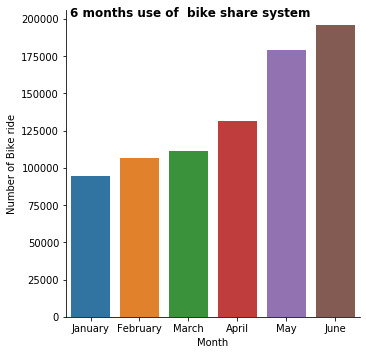

In [107]:
#Define1: change start_time and end_time to timestamps

#code
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)


# Start time month (January - June)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

# monthly use of the bike sharing system
f_graph = sb.catplot(data=df_clean, x='start_time_month', kind='count')
f_graph.set_axis_labels("Month", "Number of Bike ride")
f_graph.fig.suptitle('6 months use of  bike share system', fontweight='semibold');

## (The use of each user by weekday)
> Tuesday has the most 'Subscriber' bikers compared to other days, Then Wednesday and Thursday are approximately similar to the number of bikers on Tuesday. On the other hand the, the highest number of 'customer' bikers on Saturday then Sunday compared to other days which is due to the weekend.

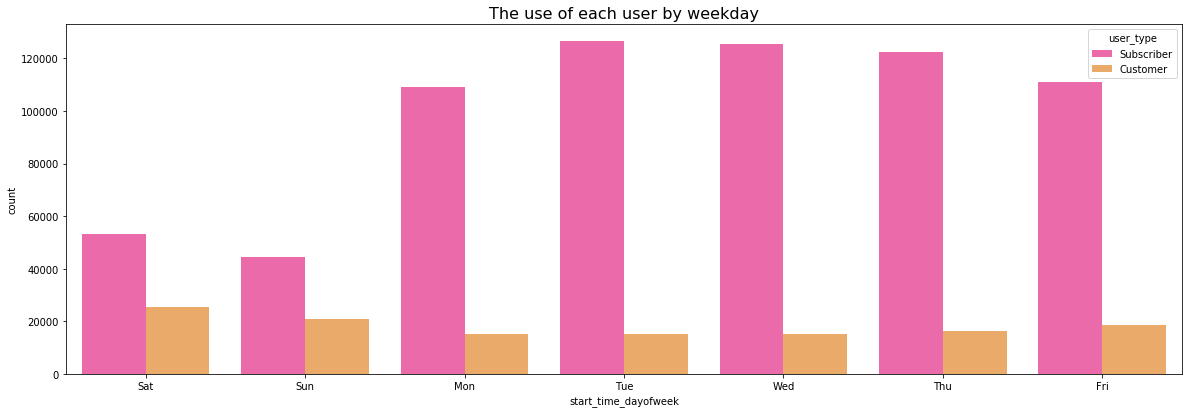

In [108]:
# get dayofweek and hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')

## make the fiqure size
plt.figure(figsize = [20, 45]);

## size of subplot
ax = plt.subplot(6, 1, 5);


# Setting the days into order
df_clean['start_time_dayofweek'] = pd.Categorical(df_clean['start_time_dayofweek'], 
                                                categories=['Sat','Sun','Mon','Tue','Wed', 'Thu','Fri'],  ordered=True)

## Show the number of use by day for each user 
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'user_type', palette = 'spring' ).set_title('The use of each user by weekday', fontsize=16);

## Trip Duration (Min) boxplot with user type

The graphs above shows the ride duration spread in minutes to visualize the trends of Customer and Subscriber easier.
For the Subscriber the ride duration is not that long, the majority are between 4 to 13 minutes. On the other hand, the Customer has ride durations longer which is quite not what I expected, it is between 8 to 22 minutes.
That make us conclude that the subscriber uses the bike for short trips like school, work, or other.


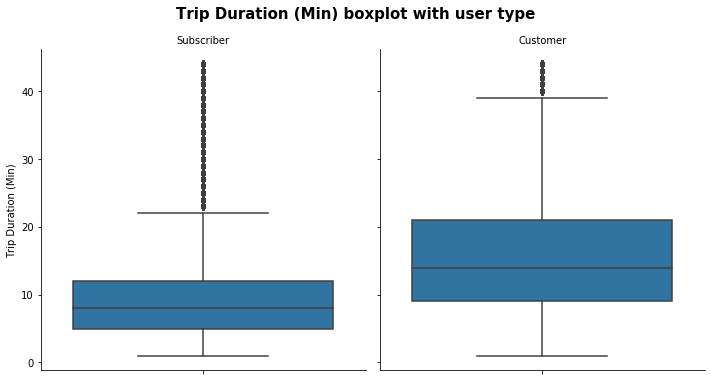

In [109]:
# Convert the duration of ride from seconds to minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

#code for the boxplot duration (Min) distribution 

con = df_clean.query('duration_min < 45')
g1 = sb.catplot(data=con, y='duration_min', col="user_type", kind='box')
g1.set_titles(col_template = '{col_name}')
g1.set_axis_labels("", "Trip Duration (Min)")
g1.fig.suptitle('Trip Duration (Min) boxplot with user type', y=1.05, fontsize=15, fontweight='semibold');

## (Hourly use during the weekday for customers and subscribers)

Customers: The heat map above shows us two cases. for the first case which is the customer, we can recognize that on May and June the heat map became darker especially between 12 PM till 6 PM and peaking in June around 5 PM.
 
Subscribers: Starting from March, most bike rides occur around 8-9 AM and 4-6 PM.and peaking on June at 8 AM and 5 PM.

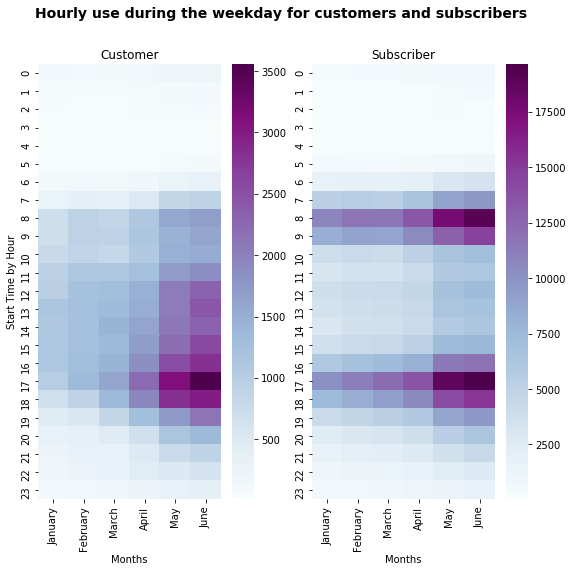

In [110]:
# get start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

# Setting the monthes into order
df_clean['start_time_month'] = pd.Categorical(df_clean['start_time_month'], 
                                                categories=['January','February','March','April','May', 'June'], ordered=True)



## make the figure size
plt.figure(figsize=(9,8))
plt.suptitle('Hourly use during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_cus = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_month"])["bike_id"].size().reset_index()
df_cus = df_cus.pivot("start_time_hour", "start_time_month", "bike_id")
sb.heatmap(df_cus, cmap="BuPu")

plt.title("Customer", y=1.014)
plt.xlabel('Months')
plt.ylabel('Start Time by Hour');



# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subs = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_month"])["bike_id"].size().reset_index()
df_subs = df_subs.pivot("start_time_hour", "start_time_month", "bike_id")
sb.heatmap(df_subs, cmap="BuPu")

plt.title("Subscriber", y=1.014)
plt.xlabel('Months')
plt.ylabel('');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!